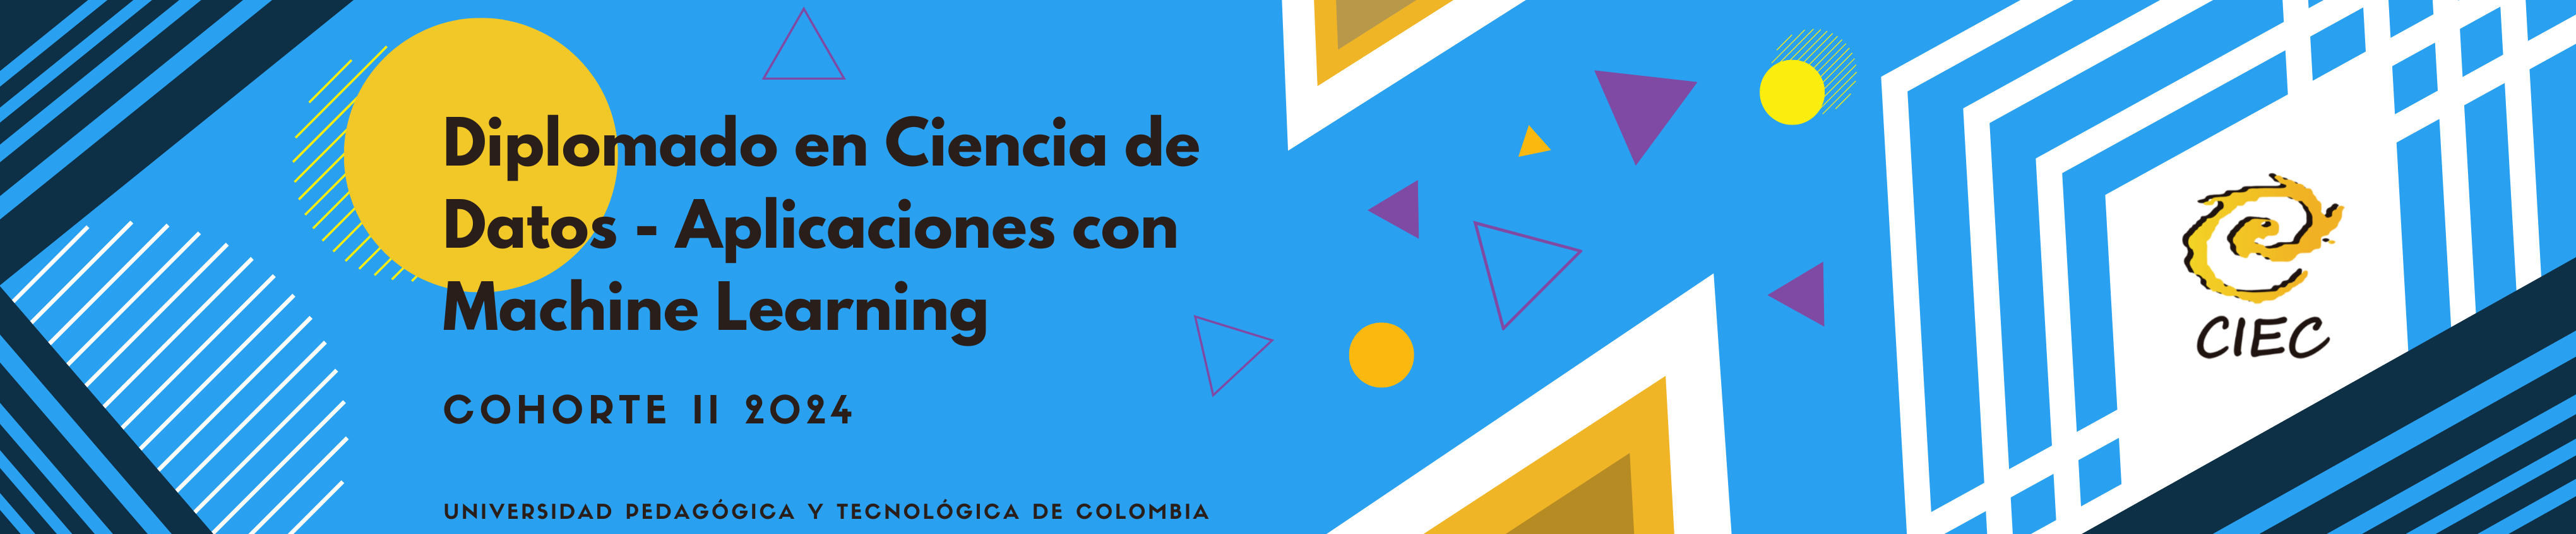

<!-- Main Title -->

**<h1 style="color: #FECB05; text-align: center;"> Algoritmo XGBoost </h1>**

---

**<h2 style="color: #007ACC;">Autores</h2>**

- [Andrés Felipe Flórez Olivera](https://www.linkedin.com/in/felipeflorezo/)

---


XGBoost (Extreme Gradient Boosting) es una implementación optimizada del algoritmo de boosting por gradiente, diseñado para ser altamente eficiente, flexible y portátil. Se utiliza comúnmente en competiciones de aprendizaje automático y aplicaciones del mundo real debido a su rendimiento superior y capacidad para manejar grandes volúmenes de datos.

## Características de XGBoost

- **Rápido y Eficiente**: Utiliza optimizaciones que aceleran el tiempo de entrenamiento, incluyendo paralelización y técnicas de poda.
- **Regularización**: Incorpora L1 (Lasso) y L2 (Ridge) para prevenir el sobreajuste, mejorando la generalización del modelo.
- **Manejo de Datos Faltantes**: Puede manejar datos faltantes automáticamente, lo que facilita su uso en conjuntos de datos reales.
- **Flexibilidad**: Permite la optimización de diferentes funciones de pérdida y la personalización de nuevos algoritmos de aprendizaje.
- **Soporte para Boosting por Gradiente**: Mejora el rendimiento del modelo ajustando iterativamente los árboles de decisión.

## Funcionamiento del Algoritmo

XGBoost sigue el principio del boosting por gradiente, que consiste en combinar múltiples modelos débiles (normalmente árboles de decisión) para crear un modelo más fuerte. El proceso básico es el siguiente:

1. **Inicialización**: Comienza con una predicción inicial (a menudo la media de la variable objetivo).

2. **Iteraciones**: En cada iteración:
   - Calcular el residuo o error de las predicciones actuales.
   - Construir un nuevo árbol de decisión que intente predecir estos errores.
   - Ajustar las predicciones combinando las predicciones del nuevo árbol con las anteriores, aplicando un coeficiente de aprendizaje (`learning rate`).
   
3. **Actualización del Modelo**: Las predicciones se actualizan sumando las predicciones del nuevo árbol al modelo actual, ponderadas por el `learning rate`.

4. **Regularización**: Durante la construcción del árbol, se aplican penalizaciones a la complejidad del árbol para evitar el sobreajuste.

5. **Finalización**: El proceso se repite hasta alcanzar el número predefinido de árboles o hasta que no se observe una mejora significativa en el error.

## Pasos Básicos del Algoritmo

1. **Definir la Función de Pérdida**: Elegir una función de pérdida apropiada para el problema (por ejemplo, MSE para regresión, log loss para clasificación).

2. **Iniciar el Modelo**: Comenzar con un modelo base (predicción media).

3. **Construcción de Árboles**:
   - Para cada iteración, calcular el gradiente y el hessiano de la función de pérdida respecto a las predicciones actuales.
   - Usar estos valores para construir un nuevo árbol que minimice la pérdida.

4. **Actualización de Predicciones**: Actualizar las predicciones con las del nuevo árbol.

5. **Evaluación y Selección de Hiperparámetros**: Usar técnicas como la validación cruzada para seleccionar el número de árboles y ajustar los hiperparámetros.

6. **Predicción Final**: Realizar predicciones sobre nuevos datos utilizando el modelo final que combina todos los árboles construidos.

#No es necesario estandarizar los datos

## Implementación:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Preparacion de los datos que se usaran

#Apertura de archivo csv a un dataframe de pandas
#revisar la ruta para tu caso particular
ruta = "/content/Churn_Modelling.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)
#Datos de los clientes de un banco, queremos entrenar una red que diga si el cliente se va o se queda

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Preprocesado de datos
from sklearn import preprocessing

#Se escogen las variable dependiente e independientes
X = dataset.iloc[:,3:13].values
y = dataset.iloc[:,13].values

#Transformar a variables categoricas ordinales
labelencoder_x_paises = preprocessing.LabelEncoder()
#cambio los nombre de los paises en categorias ordinales
X[:,1] = labelencoder_x_paises.fit_transform(X[:,1])
labelencoder_x_generos = preprocessing.LabelEncoder()
#cambio los generos en categorias ordinales
X[:,2] = labelencoder_x_generos.fit_transform(X[:,2])
#Ahorra se debe pasar a variable dummy con onehotencoder
#tranforma el arreglo en un arreglo de numpy
data = np.array(X)

# Separar la primera columna del resto
paises_column = data[:, 1].reshape(-1, 1)
generos_column = data[:, 2].reshape(-1, 1)
demas_columns = data[:, 3:]
primera_columns = data[:, 0].reshape(-1, 1)

# Crear el codificador OneHotEncoder
encoder_paises = preprocessing.OneHotEncoder(sparse_output=False)
encoder_generos = preprocessing.OneHotEncoder(sparse_output=False)

# Ajustar y transformar la primera columna
paises_column_encoded = encoder_paises.fit_transform(paises_column)
generos_column_encoded = encoder_paises.fit_transform(generos_column)

# Concatenar la columna codificada con las demás columnas
X = np.hstack((paises_column_encoded, primera_columns, generos_column_encoded, demas_columns))
#para evitar la colinealidad se deben eliminar 2 columnas una de paises y una de generos
X = np.delete(X, (0,4), axis=1)
#Division de Datos - entrenamiento y validacion
#herramienta para dividir los datos


from sklearn.model_selection import train_test_split
#divide los datos en 20% para la validacion y se colocar una semilla para hacer la division
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=34)

In [6]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [8]:
#Algoritmo de Gradient Boosting
from xgboost import XGBClassifier

#Ajuste de Gradient Boosting
clasificador = XGBClassifier(learning_rate=0.9)
clasificador.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
#Predicciones
y_pred = clasificador.predict(X_test)
y_pred = (y_pred>0.5)

In [10]:
#Evaluación
#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1470,   96],
       [ 222,  212]])

In [11]:
#Prueba de validacion cruzada
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clasificador, X = X_train, y = y_train, cv = 10)
print("Promedio de Precision Global",accuracies.mean())
print("Desviacion Estandar de las Precisiones",accuracies.std())

Promedio de Precision Global 0.835625
Desviacion Estandar de las Precisiones 0.009798756298633025


**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Andrés Felipe Florez Olivera

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---